<a href="https://colab.research.google.com/github/mroopram/GL-NLP-Student-Template---Midterm-Project-Fake-News-Detection-using-LSTMs-May-2023/blob/main/GL_NLP_Student_Template_Midterm_Project_Fake_News_Detection_using_LSTMs_May_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

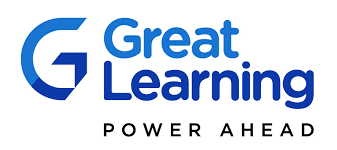

# **Hands-on Project: Fake News Detection using LSTMs**

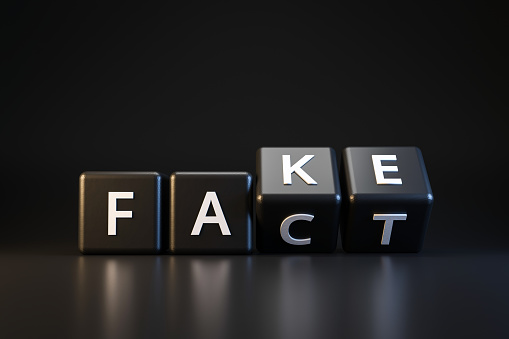

## **Context:**

In today's digital age, we are living in an era where information is available at our fingertips, thanks to social media and the internet. While this may seem like a boon for knowledge seekers, it has also led to the rise of a troubling phenomenon; fake news. **Fake news refers to false information that is deliberately spread to mislead people and shape their opinions.**

The impact of fake news cannot be underestimated. It can spread like wildfire and cause widespread panic and misinformation, leading to undesirable consequences. In recent times, we have seen how fake news has affected the political landscape, with misinformation campaigns and propaganda being used to manipulate public opinion and sway elections.

One of the most significant challenges in combating fake news is its ability to mimic real news. Fake news can be written in a way that appears legitimate, making it difficult for people to identify it as false. This is particularly true in today's era of social media, where the line between reliable sources and questionable sources is often blurred.

Businesses and organizations need to be particularly vigilant about fake news because it can have severe consequences. Decisions based on false information can result in financial losses, damage to reputation, and even legal issues. By detecting fake news, businesses can avoid making critical decisions based on misinformation and prevent potential damage to their bottom line.


## **Problem Statement:**

As a data scientist, you have been hired by a social media manager of a large company to detect instances of fake news that could harm the reputation of their brand. The task requires you to apply your expertise in data science and advanced NLP techniques to develop an effective solution for detecting fake news.


## **Dataset:**

WELFake is a dataset of 72,134 news articles with 35,028 real and 37,106 fake news. To prepare this dataset, the authors merged four popular news datasets (i.e. Kaggle, McIntire, Reuters, BuzzFeed Political) to prevent over-fitting of classifiers and to provide more text data for better ML training. The dataset contains four columns: Serial number (starting from 0); Title (about the text news heading); Text (about the news content); and Label (0 = fake and 1 = real).

## **Notebook Content & Flow**

1. [Importing the Libraries](#import)


2. [Reading the Dataset](#read_df)


3. [Merging Columns](#merging_data)
    

4. [Preprocessing the Text Data](#clean_data)
    

5. [Exploratory Data Analysis](#EDA)
    

6. [Preparing the input](#splitting)


7. [Tokenization](#Tokenization)


8. [Building and Evaluating the LSTM Model](#model_building)
    * 8.1 [Define the Model](#defining_model)
    * 8.2 [Compiling the Model](#compiling_model)
    * 8.3 [Plotting the Architecture](#plotting_architecture)
    * 8.4 [Training the Model](#training_model)
    * 8.5 [Plotting the Accuracy](#plotting_accuracy)
    * 8.6 [Evaluating the Model](#evaluating_model)
    * 8.7 [Classification Report](#classification_report)
    * 8.8 [Plotting the Confusion Matrix](#confusion_matrix)
    
    
9. [Conclusions and Learnings](#Conclusions_and_Learnings)

<a id='import'></a>

## **1. Importing the Libraries**

### **Q1: Import the necessary libraries and briefly explain the use of each library (5 marks)**

In [ ]:
### Add your code here

# Importing the required the libraries
import numpy as np
# To read and manipulate the data
import pandas as pd

# To visualise the graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Helps to display the images
from PIL import Image

# Helps to visualize the wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from tqdm import tqdm

# Helps to extract the data using regular expressions
import regex as re

# Split data into training and testing set
from sklearn.model_selection import train_test_split

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

import os
from os.path import exists

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam

from tensorflow import keras

## **2. Reading the Dataset**

<a id='read_df'></a>
### **Q2: Read the WELFake dataset and print initial information using Pandas (5 marks)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Great Learning/FakeNews/WELFake_Dataset.csv")
df.head(5)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
df.tail(5)

,Unnamed: 0,title,text,label
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0
72133,72133,Goldman Sachs Endorses Hillary Clinton For Pre...,Goldman Sachs Endorses Hillary Clinton For Pre...,1


In [ ]:
df.shape

(72134, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


<a id='merging_data'></a>
## **3. Merging the Columns**
### **Q3: Merge the columns - title and text (5 marks)**

In [ ]:
### Add your code here
df['title text'] = df['title'] + ' ' + df['text']
df = df.drop(['text', 'title'], axis=1)
df.shape

(72134, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   label       72134 non-null  int64 
 2   title text  71537 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.7+ MB


In [ ]:
df.head(5)

,Unnamed: 0,label,title text
0,0,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,1,1,NaN
2,2,1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,3,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,4,1,SATAN 2: Russia unvelis an image of its terrif...


In [ ]:
df['text'] = df['title text']
df = df.drop(['title text'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   label       72134 non-null  int64 
 2   text        71537 non-null  object
dtypes: int64(2), object(1)
memory usage: 1.7+ MB


In [ ]:
df.head(5)

,Unnamed: 0,label,text
0,0,1,LAW ENFORCEMENT ON HIGH ALERT Following Threat...
1,1,1,NaN
2,2,1,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...
3,3,0,"Bobby Jindal, raised Hindu, uses story of Chri..."
4,4,1,SATAN 2: Russia unvelis an image of its terrif...


<a id='clean_data'></a>

## **4. Preprocessing the Text Data**

### **Q4: Preprocess the values of the text & headline columns (5 marks)**
- Remove unwanted characters
- Convert text to lowercase
- Remove unwanted spaces
- Remove stopwords
- Replace empty strings with Null
- Drop null values from the dataframe
- Delete duplicate rows

In [ ]:
import re
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

def preprocess_text(df, column_name=''):

  # Replace empty strings with Null
  df = df.replace(r'^\s+$', np.nan, regex=True)

  # Drop Null values
  df = df.dropna()

  # Select only alphabets
  df['text'] = df['text'].apply(lambda x: x.replace(u'\xa0',u' '))
  df['text'] = df['text'].apply(lambda x: x.replace('\u200a',' '))

  # Convert text to lowercase
  df['text'] = df['text'].apply(lambda x: x.strip())

  # Strip unwanted spaces
  df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

  # Remove stopwords
  df['text'] = df['text'].apply(lambda x: x.lower())


  # delete duplicate rows
  df = df.drop_duplicates()

  return df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Use the `preprocess_text` function on text column

In [ ]:
df = preprocess_text(df, column_name='text')

In [ ]:
df[['text', 'label']].head()

,text,label
0,law enforcement on high alert following threat...,1
2,unbelievable! obama’s attorney general says mo...,1
3,"bobby jindal, raised hindu, uses story christi...",0
4,satan 2: russia unvelis image terrifying new ‘...,1
5,about time! christian group sues amazon splc d...,1


<a id='EDA'></a>

## **5. Exploratory Data Analysis**

### **Q5: Perform EDA on the data**

### **Q5.1: Create a Word Cloud for the entire `text` column (5 marks)**

There are 183275079 words in the combination of all texts.


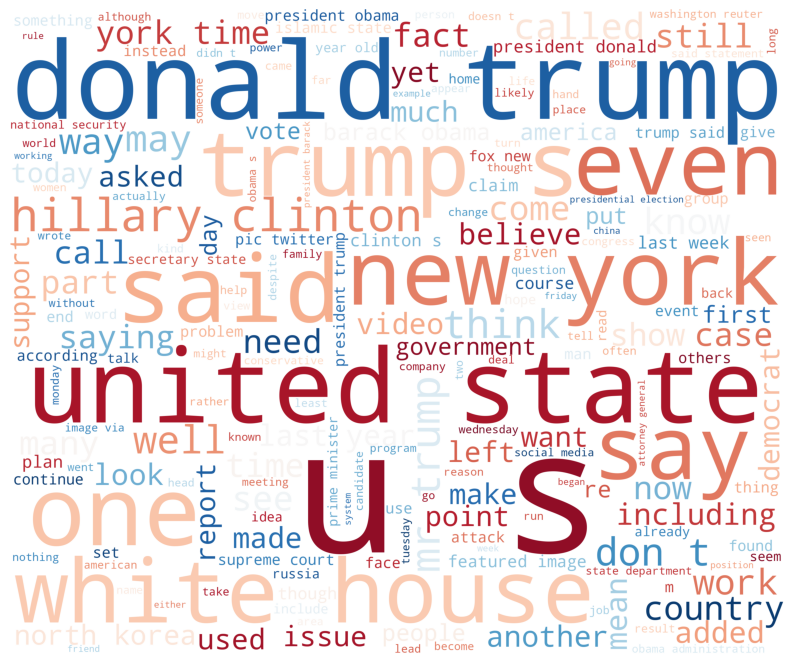

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

all_news = ' '.join(text for text in df['text'])
### Add your code below
print ("There are {} words in the combination of all texts.".format(len(all_news)))

wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(all_news)

plt.figure(1, figsize = (10, 10))

# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


### **Q5.2: Create separate Word Clouds for Fake News and Real News (5 marks)**

In [ ]:
fake_news = df[df['label'] == 0]
real_news = df[df['label'] == 1]

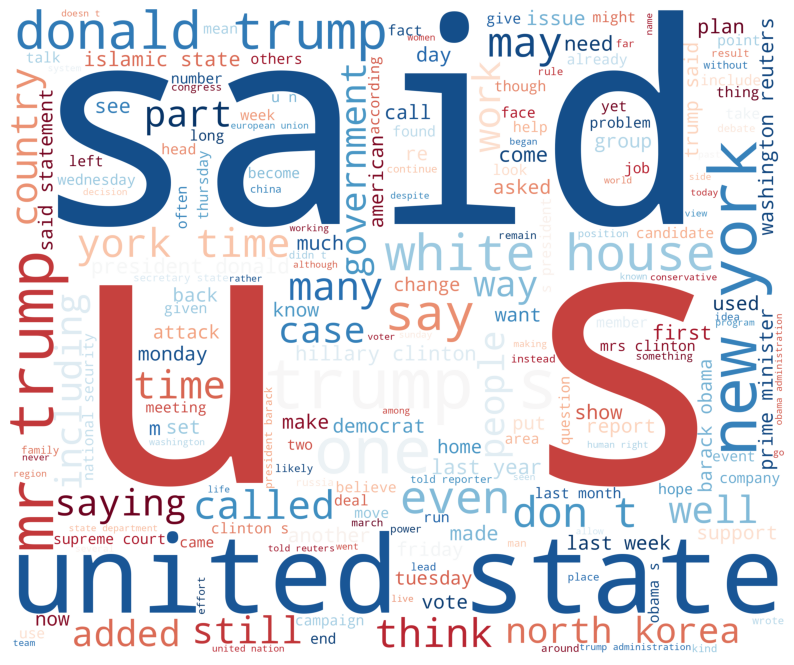

In [ ]:
fake_texts = ' '.join(text for text in fake_news['text'])
### Add your code below
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(fake_texts)

plt.figure(1, figsize = (10, 10))

# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

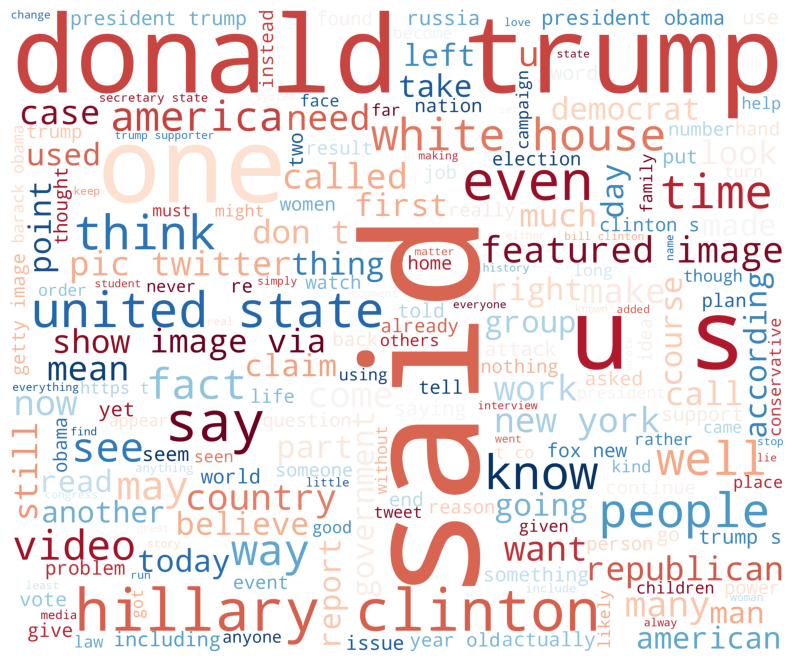

In [ ]:
real_texts = ' '.join(text for text in real_news['text'])
### Add your code below
wordcloud = WordCloud(stopwords = STOPWORDS,
                      colormap = 'RdBu',
                      background_color = 'white',
                      width = 3000,
                      height = 2500
                     ).generate(real_texts)

plt.figure(1, figsize = (10, 10))

# Using the .imshow() method of matplotlib.pyplot to display the Word Cloud as an image.
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### **Q5.3: Plot the distribution of Fake & Real News (5 marks)**

<Axes: xlabel='label', ylabel='count'>

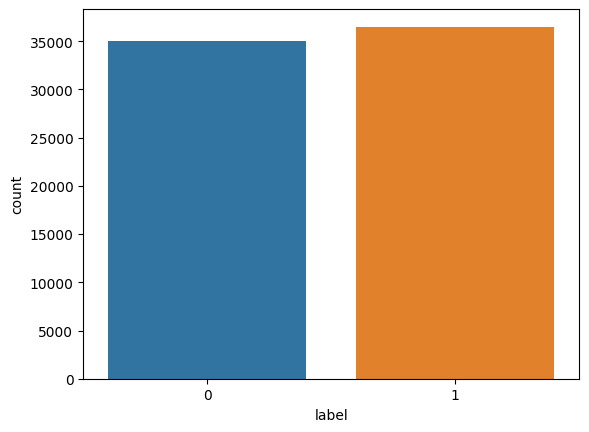

In [ ]:
### Add your code here
sns.countplot(x=df['label'], data=df)

In [ ]:
df['label'].value_counts()

1    36509
0    35028
Name: label, dtype: int64

### **Q5.4: Plot the distribution of the News Words count (5 marks)**

In [ ]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))

Text(0.5, 1.0, 'Distribution of the News Words count')

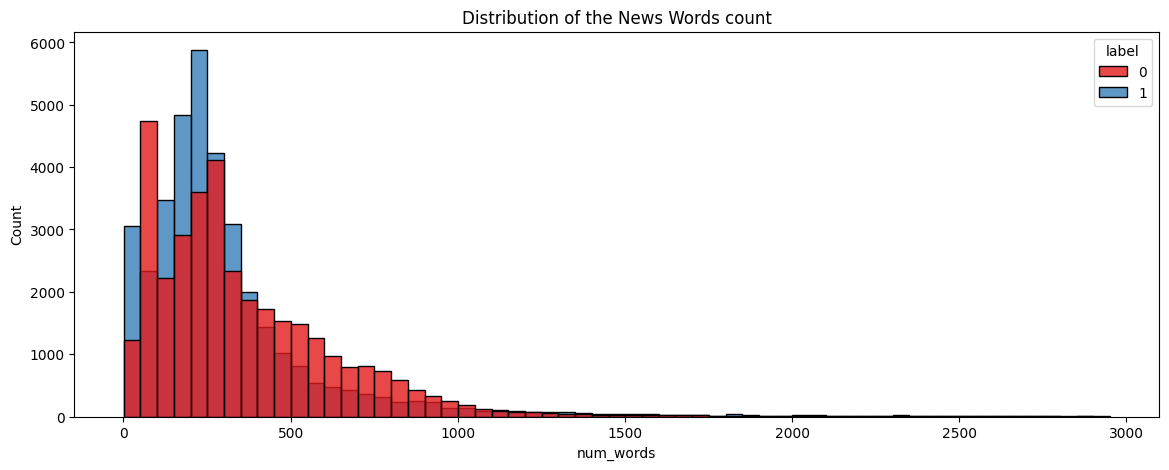

In [ ]:
plt.figure(figsize = (14,5))
sns.histplot(data=df, x="num_words", bins = range(1, 3000, 50), palette = 'Set1', hue = 'label', alpha = 0.8)
plt.title('Distribution of the News Words count')

<a id='splitting'></a>

## **6. Preparing the input (5 marks)**

### **Q6: Splitting the dataset into the training and testing set**

In [ ]:
X = df['text']
y = df['label']


In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)



Shape of Training set :  (57229,)
Shape of test set :  (14308,)


<a id='Tokenization'></a>

## **7. Tokenization (5 marks)**

### **Q7: Perform the below mentioned operations:**
- Define a Tokenizer
- Fit the Tokenizer on training data
- Tokenize the sentences using the trained tokenizer object
- Print the size of the vocabulary

In [ ]:
# Define Keras Tokenizer
tok = Tokenizer()
### Add your code here
tok.fit_on_texts(df['text'])

# return sequences
sequences = tok.texts_to_sequences(X_train)
test_sequences = tok.texts_to_sequences(X_test)


In [ ]:
# print size of the vocabulary
total_words = len(tok.word_index) + 1
print("The number of words in the index is", total_words)

The number of words in the index is 322492


### **Pad sequences to fixed length**

In [ ]:
# maximum sequence length (512 to prevent memory issues and speed up computation)

MAX_LEN = 512

# padded sequences
X_train_seq = pad_sequences(sequences, maxlen=MAX_LEN)
X_test_seq = pad_sequences(test_sequences, maxlen=MAX_LEN)

In [ ]:
X_train_seq.shape[1]

512

In [ ]:
print("Shape of Training set : ", X_train_seq.shape)
print("Shape of test set : ", X_test_seq.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize = True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize = True))

Shape of Training set :  (57229, 512)
Shape of test set :  (14308, 512)
Percentage of classes in training set:
1    0.511664
0    0.488336
Name: label, dtype: float64
Percentage of classes in test set:
1    0.505102
0    0.494898
Name: label, dtype: float64


<a id='model_building'></a>

## **8. Building and Evaluating the LSTM Model to Predict Fake News**

### **Q8: Define and compile the LSTM model, get predictions, and evaluate the output.**

<a id='defining_model'></a>

### **Q8.1: Perform the below mentioned operations: (5 marks)**
- Define a sequential model
- Add an Embedding layer
- Add a Dropout layer
- Add an LSTM layer
- Add a Dropout layer
- Add a Dense layer
- Print model summary

In [ ]:
# Creating model Using LSTM
embedding_vector_features=40

model = Sequential()

model.add(Embedding(total_words, embedding_vector_features, input_length=MAX_LEN))
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 512, 40)           12899680  
                                                                 
Total params: 12,899,680
Trainable params: 12,899,680
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Adding Hidden Layer 1 - LSTM Layer
model.add(LSTM(150,return_sequences=True))
model.add(LSTM(100,activation='sigmoid'))

model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 512, 40)           12899680  
                                                                 
 lstm_12 (LSTM)              (None, 512, 150)          114600    
                                                                 
 lstm_13 (LSTM)              (None, 100)               100400    
                                                                 
Total params: 13,114,680
Trainable params: 13,114,680
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Adding Output Layer
model.add(Dense(1, activation = 'sigmoid'))

opt = tf.keras.optimizers.legacy.Adam(learning_rate = 1e-6,decay=1e-6)

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 512, 40)           12899680  
                                                                 
 lstm_12 (LSTM)              (None, 512, 150)          114600    
                                                                 
 lstm_13 (LSTM)              (None, 100)               100400    
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 13,114,781
Trainable params: 13,114,781
Non-trainable params: 0
_________________________________________________________________
None


<a id='compiling_model'></a>

### **Q8.2: Compile the model (5 marks)**
- Use loss as `binary_crossentropy`
- Use optimizer as `adam`
- Use metrics as `accuracy`

In [ ]:
model.compile(loss='binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

<a id='plotting_architecture'></a>

### **Q8.3: Plot the model architecture (5 marks)**
- Plot model architecture using plot_model function

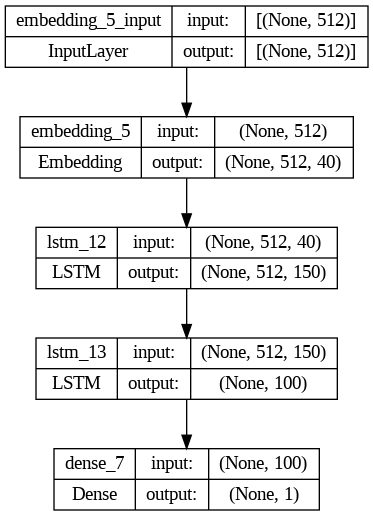

In [ ]:
# plot the model architecture
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True)


<a id='training_model'></a>

### **Q8.4: Training the model (10 marks)**
- Use a validation split of 20% during the training
- Epochs: 10 minimum
- Define batch size
- Use callbacks

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)

mcp_save = ModelCheckpoint('.mdl_wts.h5', save_best_only=True, monitor='loss', mode='min')

history = model.fit(X_train_seq, y_train, epochs = 20, batch_size = 700, callbacks=[es, mcp_save], verbose = 'auto')

Epoch 1/20
82/82 [==============================] - 103s 1s/step - loss: 0.6955 - accuracy: 0.5117
Epoch 2/20
82/82 [==============================] - 103s 1s/step - loss: 0.6955 - accuracy: 0.5117
Epoch 3/20
82/82 [==============================] - 99s 1s/step - loss: 0.6955 - accuracy: 0.5117
Epoch 4/20
82/82 [==============================] - 101s 1s/step - loss: 0.6955 - accuracy: 0.5117
Epoch 5/20
82/82 [==============================] - 101s 1s/step - loss: 0.6955 - accuracy: 0.5117
Epoch 6/20
82/82 [==============================] - 118s 1s/step - loss: 0.6954 - accuracy: 0.5117
Epoch 7/20
82/82 [==============================] - 101s 1s/step - loss: 0.6954 - accuracy: 0.5117
Epoch 8/20
82/82 [==============================] - 103s 1s/step - loss: 0.6954 - accuracy: 0.5117
Epoch 9/20
82/82 [==============================] - 99s 1s/step - loss: 0.6954 - accuracy: 0.5117
Epoch 10/20
82/82 [==============================] - 101s 1s/step - loss: 0.6954 - accuracy: 0.5117
Epoch 11/20

<a id='plotting_accuracy'></a>

### **Q8.5: Plot the Train/Validation Loss and Accuracy (5 marks)**

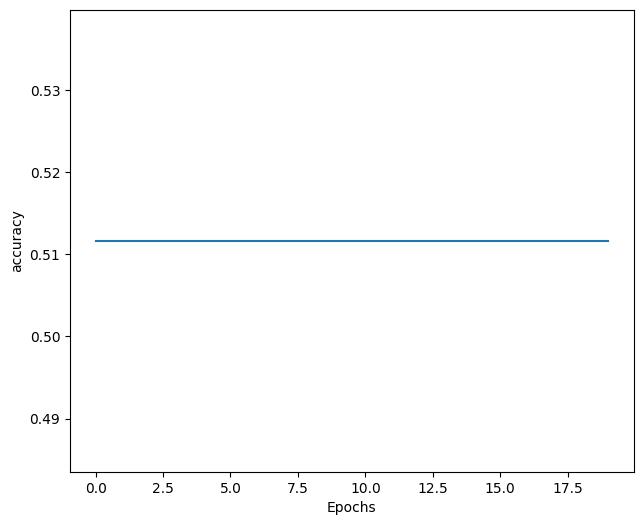

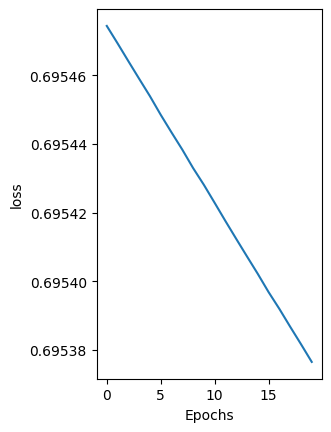

In [ ]:
# plot the train/validation loss and accuracy
def plot_graphs(history, metric):

 plt.plot(history.history[metric])
 plt.xlabel("Epochs")
 plt.ylabel(metric)
 plt.show()

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

<a id='evaluating_model'></a>

### **Q8.6: Evaluate the model (5 marks)**
- For final evaluation we use the separate test set

In [ ]:
# Metrics to evaluate the model
test_loss, test_acc = model.evaluate(X_test_seq, y_test)
y_hat = (model.predict(X_test_seq) > 0.5).astype("int32")

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

448/448 [==============================] - 35s 78ms/step
Test Loss: 0.6966078877449036
Test Accuracy: 0.5051020383834839


<a id='classification_report'></a>

### **Q8.7: Print the classification report (5 marks)**

In [ ]:
# print classification report
print(classification_report(y_hat, y_test))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.51      0.67     14308

    accuracy                           0.51     14308
   macro avg       0.50      0.25      0.34     14308
weighted avg       1.00      0.51      0.67     14308



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<a id='confusion_matrix'></a>

### **Q8.8: Plot the confusion matrix (5 marks)**

In [ ]:
# plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_hat)
conf_matrix

array([[   0, 7081],
       [   0, 7227]])

Text(70.72222222222221, 0.5, 'Real Labels')

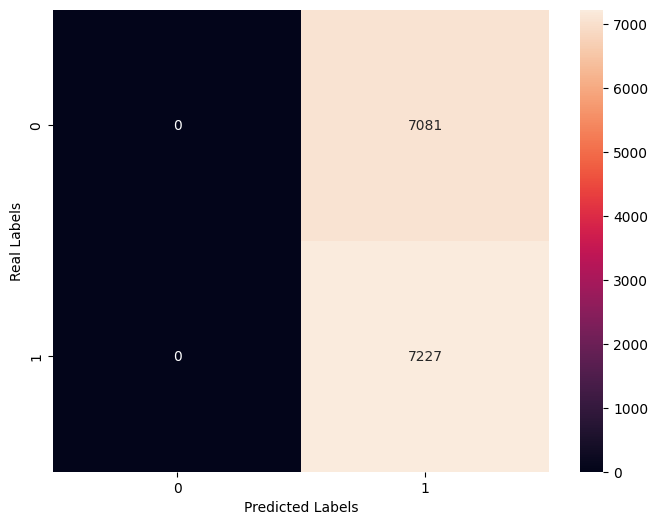

In [ ]:
plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', )
plt.xlabel('Predicted Labels')
plt.ylabel('Real Labels')

<a id='Conclusions_and_Learnings'></a>

##  **9. Conclusions and Learnings**

### **Q9: Add your Conclusions and Learnings from this project (5 marks)**
The model performance is very poor. It shows 1.00 precision for predicting real news and 0 precision for predicting fake news, meaning it predicts all news as real. The heatmap shows all fake news as a false positive and all real news as a true negative.

Incorporating data from fact checking websites may be helpful. In addition clear definitions about what makes real news and what makes fake news may assist in better classifications. Regardless training a model on words alone does not accurately predict real or fake news. Due to the political and societal impact of fake news high accuracy is necessary for model deployment.